## Final Project for Programming Analytics

In [1]:
#Importing Libraries for the Project 
import pandas as pd 
import datetime 
import numpy as np
import scipy.stats
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from pandas import DataFrame
import itertools
import timeit

#Type plot - XKCD 
#plt.xkcd()

#plotting inline
%matplotlib inline

In [2]:
%%javascript
//This function is used to Plot Graph in Jupyter with keeping Autoscrolling off.
IPython.OutputArea.prototype._should_scroll = function(lines){
    return false;}

<IPython.core.display.Javascript object>

In [3]:
#Start date and End date is refers to time period for fetching the data using the Pandas dataframe API
#We have selected data for atleast 2 years to include variability due to seasoning and external conditions over the period of time
start_date = datetime.datetime(2015, 12, 5)
end_date = datetime.datetime(2017, 12, 5)

Fetching Data for the individual Crypto-Currency in individual blocks to make sure they are loaded properly without any errors

In [4]:
#Bitcion to USD Trading Data
BTC_USD = web.DataReader("BTC-USD", "yahoo", start_date, end_date)
BTC_USD.to_csv("BTC_USD.csv")

In [5]:
#Ethereium to USD Trading Data
ETH_USD = web.DataReader("ETH-USD", "yahoo", start_date, end_date)
ETH_USD.to_csv("ETH_USD.csv")

In [6]:
#Litecoin to USD Trading Data
LTC_USD = web.DataReader("LTC-USD", "yahoo", start_date, end_date)
LTC_USD.to_csv("LTC_USD.csv")

In [9]:
#XRP to USD Trading Data
XRP_USD = web.DataReader("XRP-USD", "yahoo", start_date, end_date)
XRP_USD.to_csv("XRP_USD.csv")

In [10]:
#Bitcoin_cash to USD Trading Data
BCH_USD = web.DataReader("LTC-USD", "yahoo", start_date, end_date)
BCH_USD.to_csv("BCH_USD.csv")

In [11]:
#IOTA to USD Trading Data
IOT_USD = web.DataReader("IOT-USD", "yahoo", start_date, end_date)
IOT_USD.to_csv("IOT_USD.csv")

In [12]:
#DASH-USD to USD Trading Data
DSH_USD = web.DataReader("DASH-USD", "yahoo", start_date, end_date)
DSH_USD.to_csv("DSH_USD.csv")

In [13]:
Coin_list = [BTC_USD, LTC_USD, BCH_USD, DSH_USD, ETH_USD, IOT_USD, XRP_USD]
Coin_list_str = ["BTC_USD", "LTC_USD", "BCH_USD", "DSH_USD", "ETH_USD", "IOT_USD", "XRP_USD"]

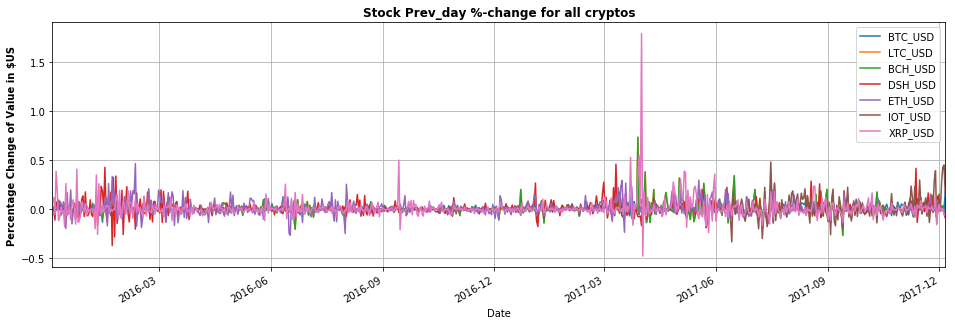

In [14]:
#Testing_Data, checking daily returns over the entire period
for i,j in itertools.zip_longest(Coin_list,Coin_list_str):
    i["Adj Close"].pct_change().plot(figsize=(16,5), grid=True)
    plt.title(u"Stock Prev_day %-change for all cryptos", weight='bold')
    plt.ylabel("Percentage Change of Value in $US",weight='bold')
    plt.legend(Coin_list_str)

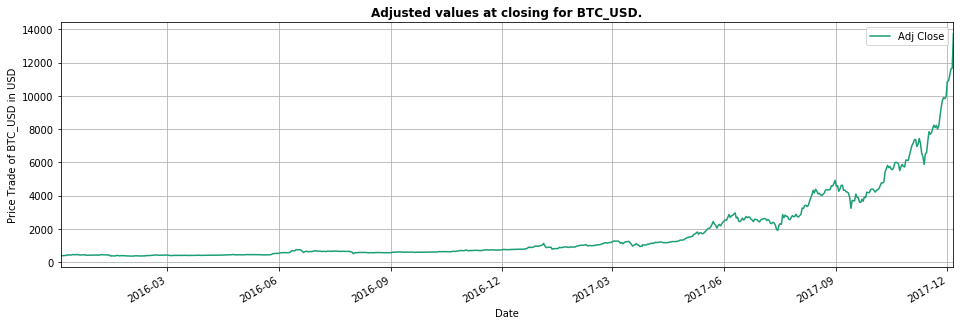

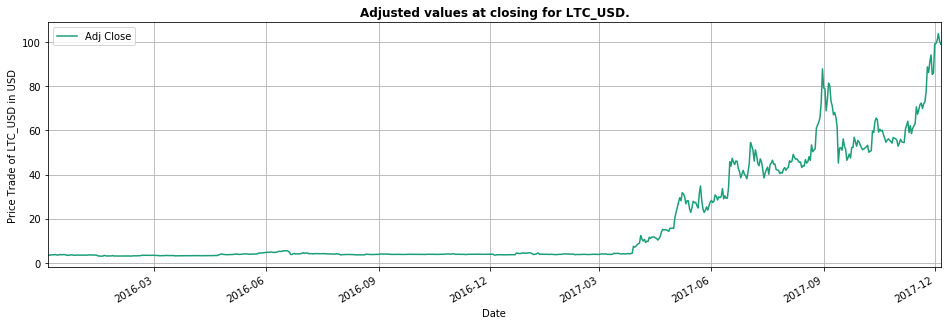

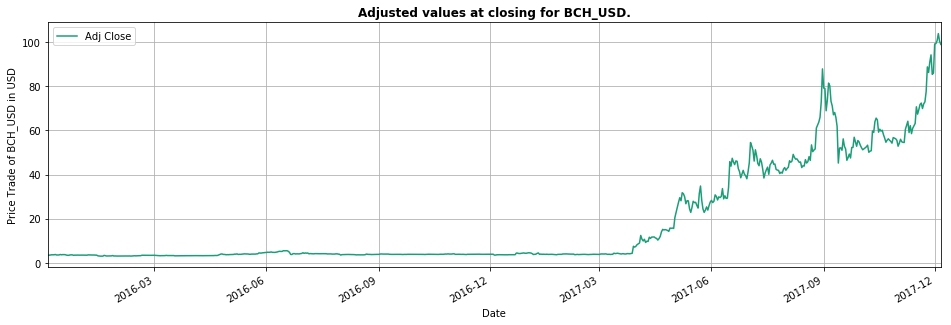

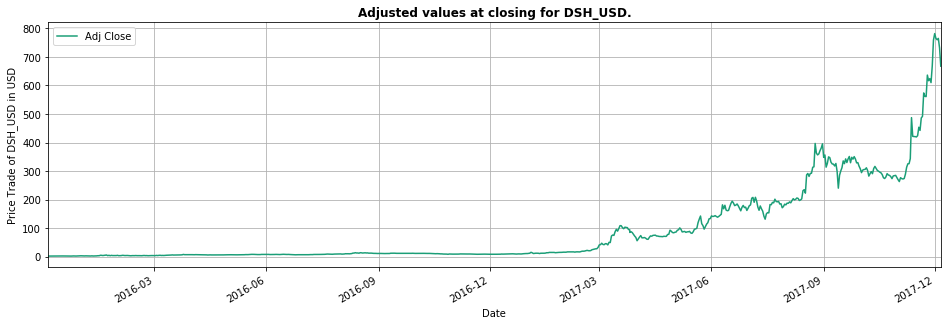

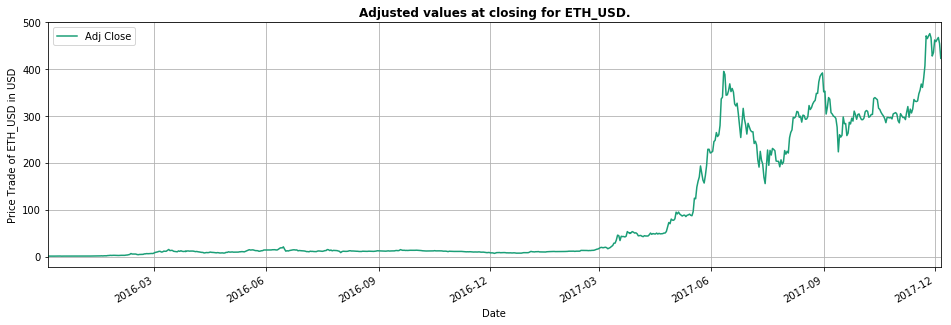

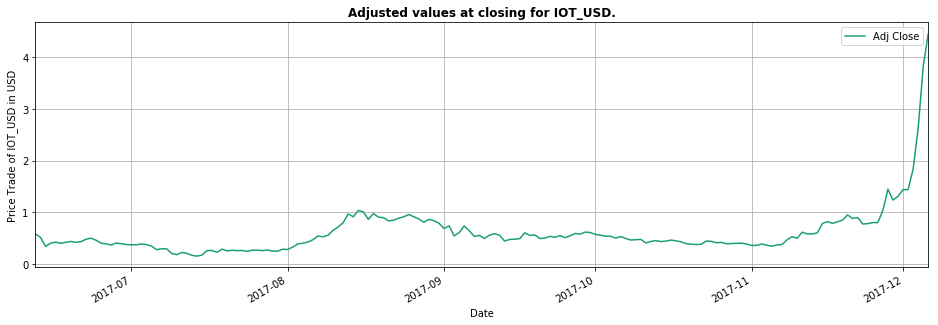

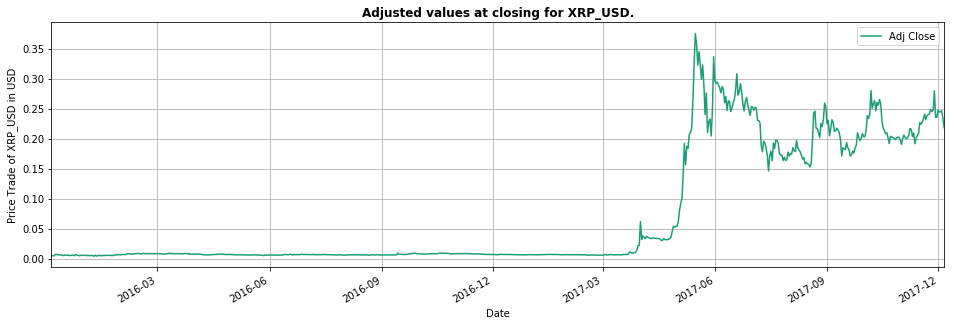

In [15]:
#Testing_Data_with _Ploting in loop for Adjusted close
for i,j in itertools.zip_longest(Coin_list,Coin_list_str):
    i.plot(y="Adj Close",figsize=(16,5), grid=True, colormap='Dark2')
    plt.title("Adjusted values at closing for " + j + "." , weight='bold')
    plt.ylabel("Price Trade of " + j +" in USD")

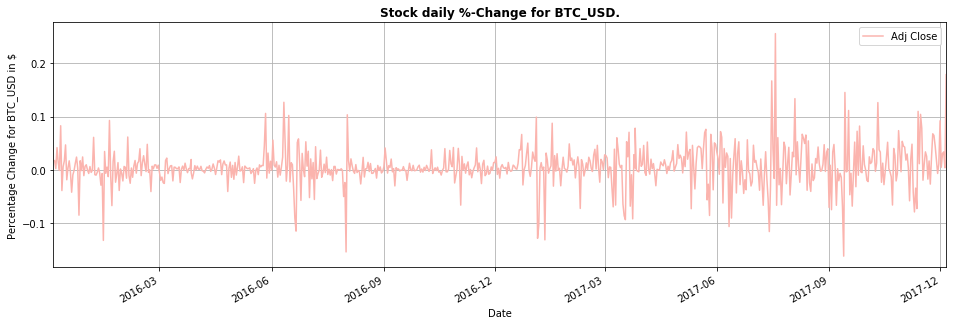

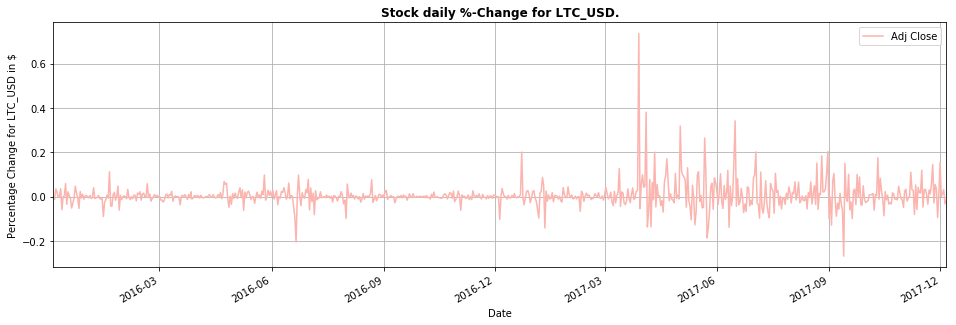

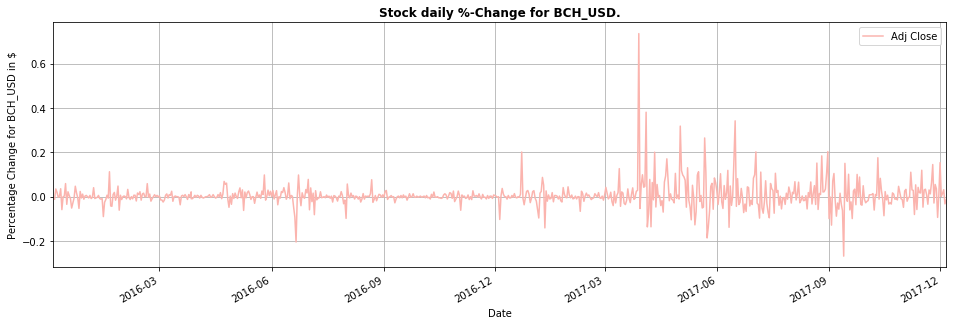

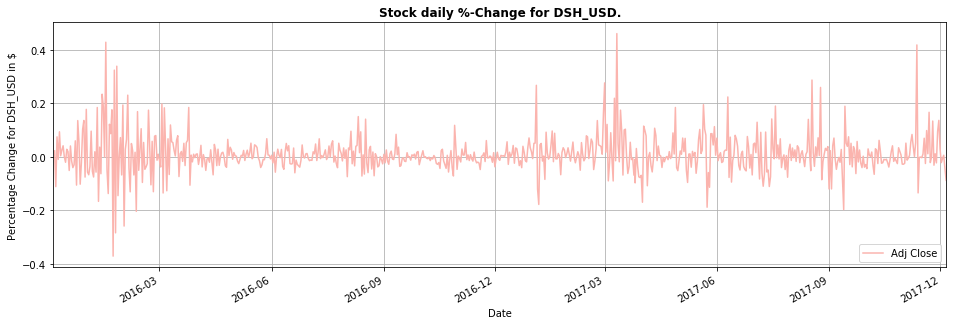

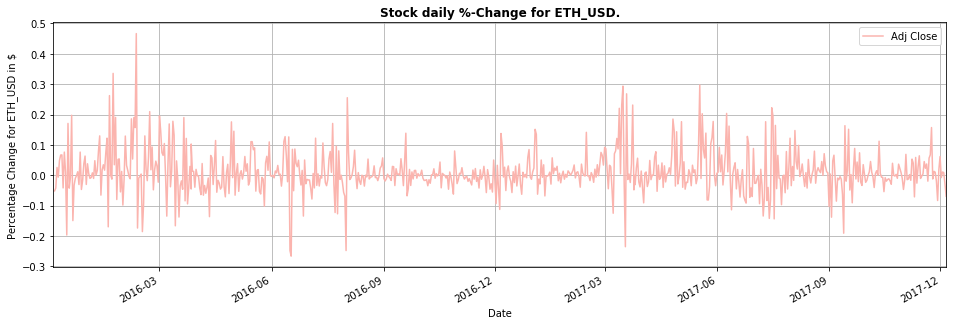

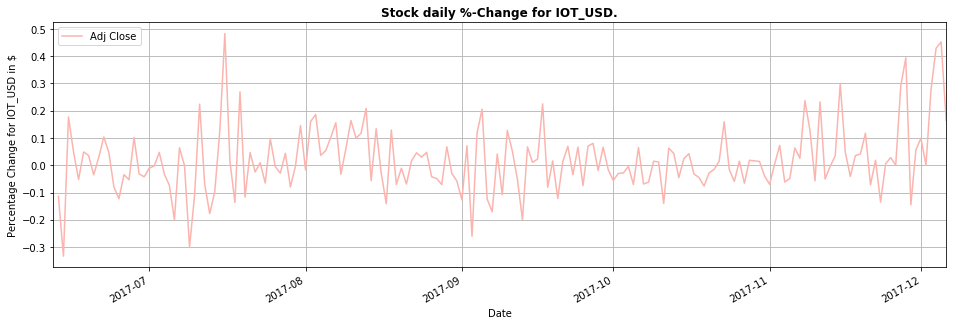

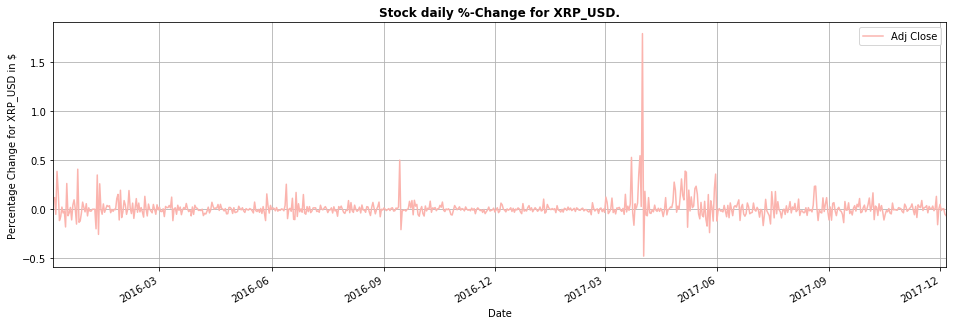

In [16]:
#Testing_Data_with _Ploting in loop
for i,j in itertools.zip_longest(Coin_list,Coin_list_str):
    fig = plt.figure()
    i["Adj Close"].pct_change().plot(figsize=(16,5), grid=True, colormap='Pastel1')
    plt.title(u"Stock daily %-Change for "+ j + ".", weight='bold')
    plt.ylabel("Percentage Change for " + j +" in $")
    plt.legend()

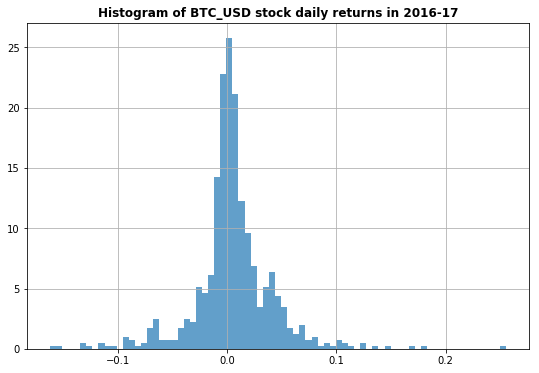

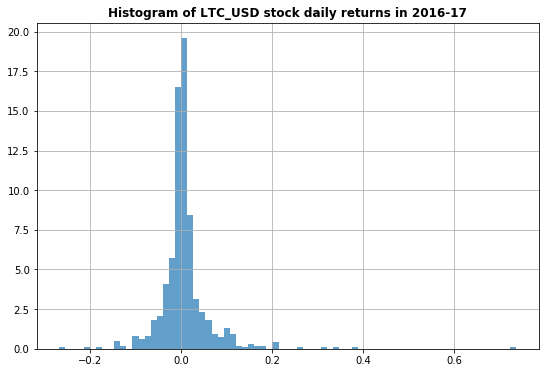

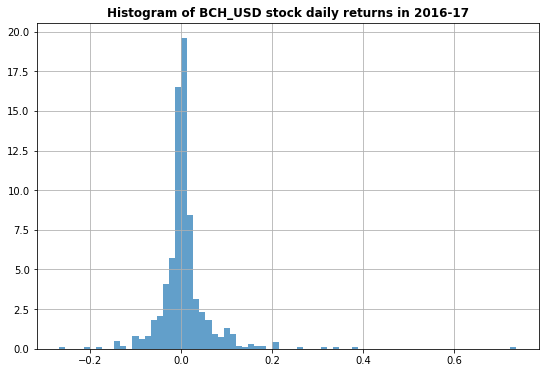

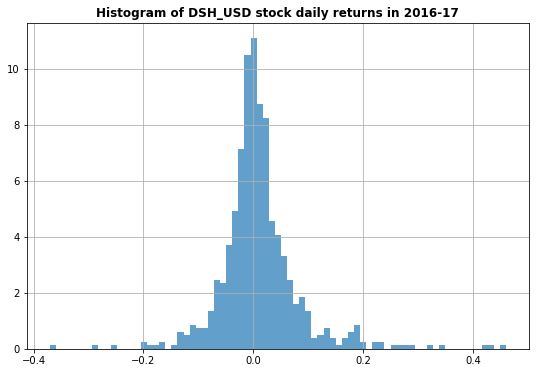

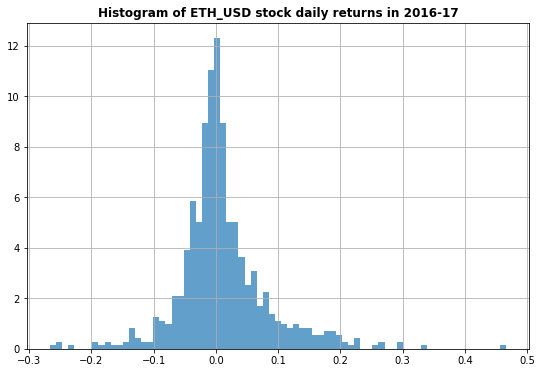

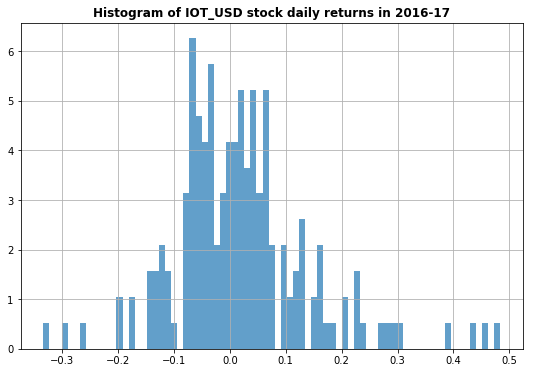

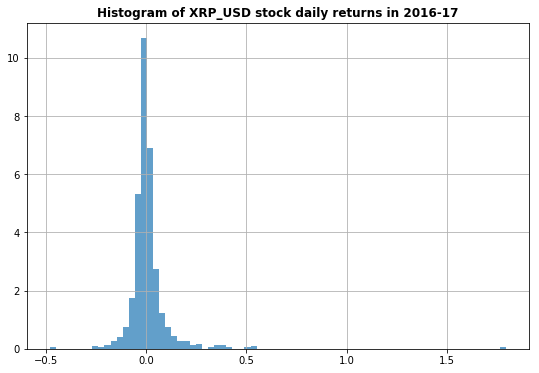

In [19]:
for i,j in itertools.zip_longest(Coin_list,Coin_list_str):
    fig = plt.figure()
    i["Adj Close"].pct_change().hist(bins=75, normed=True, histtype='stepfilled', alpha=0.7,figsize=(9,6))
    plt.title(u"Histogram of "+j+" stock daily returns in 2016-17", weight='bold')
    i["Adj Close"].pct_change().std()

In [20]:
#Correlation between the stocks with %change with trade next day
df = DataFrame({ 'BTC_USD': BTC_USD["Close"].pct_change(),
                 'IOT_USD': IOT_USD["Close"].pct_change(),
                 'LTC_USD': LTC_USD["Close"].pct_change(),
                 'BCH_USD': BCH_USD["Close"].pct_change(),
                 'XRP_USD': XRP_USD["Close"].pct_change(),
                 'ETH_USD': ETH_USD["Close"].pct_change(),
                 'DSH_USD': DSH_USD["Close"].pct_change()})
dfna = df.dropna()

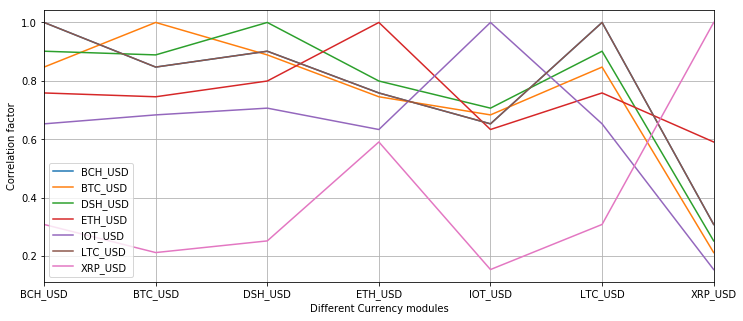

In [26]:
dfna.corr(method='pearson').plot(figsize=(12,5), grid=True)
plt.xlabel("Different Currency modules")
plt.ylabel("Correlation factor")

In [22]:
#Correlation between the stocks
df = DataFrame({ 'BTC_USD': BTC_USD["Close"],
                 'IOT_USD': IOT_USD["Close"],
                 'LTC_USD': LTC_USD["Close"],
                 'BCH_USD': BCH_USD["Close"],
                 'XRP_USD': XRP_USD["Close"],
                 'ETH_USD': ETH_USD["Close"],
                 'DSH_USD': DSH_USD["Close"]})
dfna = df.dropna()

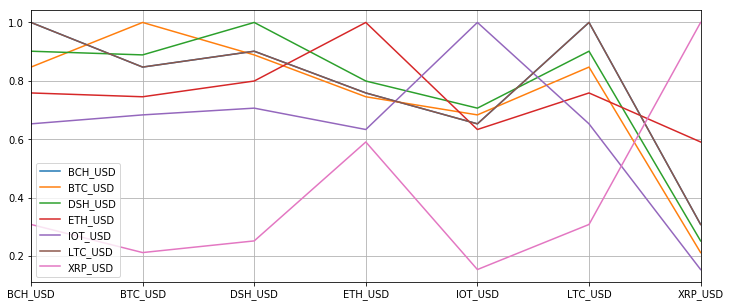

In [29]:
dfna.corr(method='pearson').plot(figsize=(12,5), grid=True)